# Top 20 MF + BP GOs for Downregulated DEGs unique to CX

### Import Packages

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

### BP Data

In [2]:
bp_cx_cb_data = pd.read_csv("bp_cx_cb_down_copy.csv")
print(bp_cx_cb_data.shape)
bp_cx_cb_data.head()

(1163, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down
0,GO:BP,localization,GO:0051179,6297,27543,5.280000e-87,5.280000e-87,1642,733,0.446407,9.590000e-28,9.590000e-28,779,321,0.412067
1,GO:BP,system development,GO:0048731,4533,27543,5.840000e-87,5.840000e-87,1756,624,0.355353,6.570000e-27,6.570000e-27,851,273,0.320799
2,GO:BP,nervous system development,GO:0007399,2479,27543,3.040000e-85,3.040000e-85,1693,419,0.247490,3.130000e-37,3.130000e-37,811,199,0.245376
3,GO:BP,multicellular organism development,GO:0007275,5045,27543,1.040000e-78,1.040000e-78,1752,649,0.370434,7.100000e-25,7.100000e-25,851,288,0.338425
4,GO:BP,anatomical structure development,GO:0048856,6186,27543,1.090000e-77,1.090000e-77,1756,740,0.421412,1.220000e-19,1.220000e-19,851,316,0.371328


In [3]:
bp_cx_cb_data = bp_cx_cb_data[(bp_cx_cb_data.term_size < 5000) & (bp_cx_cb_data.term_size > 8)]
bp_cx_cb_data.shape

(1113, 15)

In [4]:
bp_unique_cx = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CB_Down >= 0.05)].sort_values(by="adjusted_p_value__CX_Down")
bp_unique_cx = bp_unique_cx[1:21].sort_values(by='gene_ratio_CX_Down', ascending = False)
bp_unique_cx["region"] = "CX"
print(bp_unique_cx.shape)
bp_unique_cx.head()

(20, 16)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region
137,GO:BP,macromolecule modification,GO:0043412,3898,27543,2.660000e-24,2.660000e-24,1738,410,0.235903,1.000000,1.000000,868,146,0.168203,CX
103,GO:BP,cellular protein modification process,GO:0006464,3707,27543,2.270000e-28,2.270000e-28,1738,408,0.234753,1.000000,1.000000,868,144,0.165899,CX
102,GO:BP,protein modification process,GO:0036211,3707,27543,2.270000e-28,2.270000e-28,1738,408,0.234753,1.000000,1.000000,868,144,0.165899,CX
74,GO:BP,phosphate-containing compound metabolic process,GO:0006796,2777,27543,3.680000e-36,3.680000e-36,1756,355,0.202164,0.485442,0.485442,868,120,0.138249,CX
173,GO:BP,macromolecule localization,GO:0033036,2970,27543,9.070000e-20,9.070000e-20,1737,321,0.184801,1.000000,1.000000,821,117,0.142509,CX


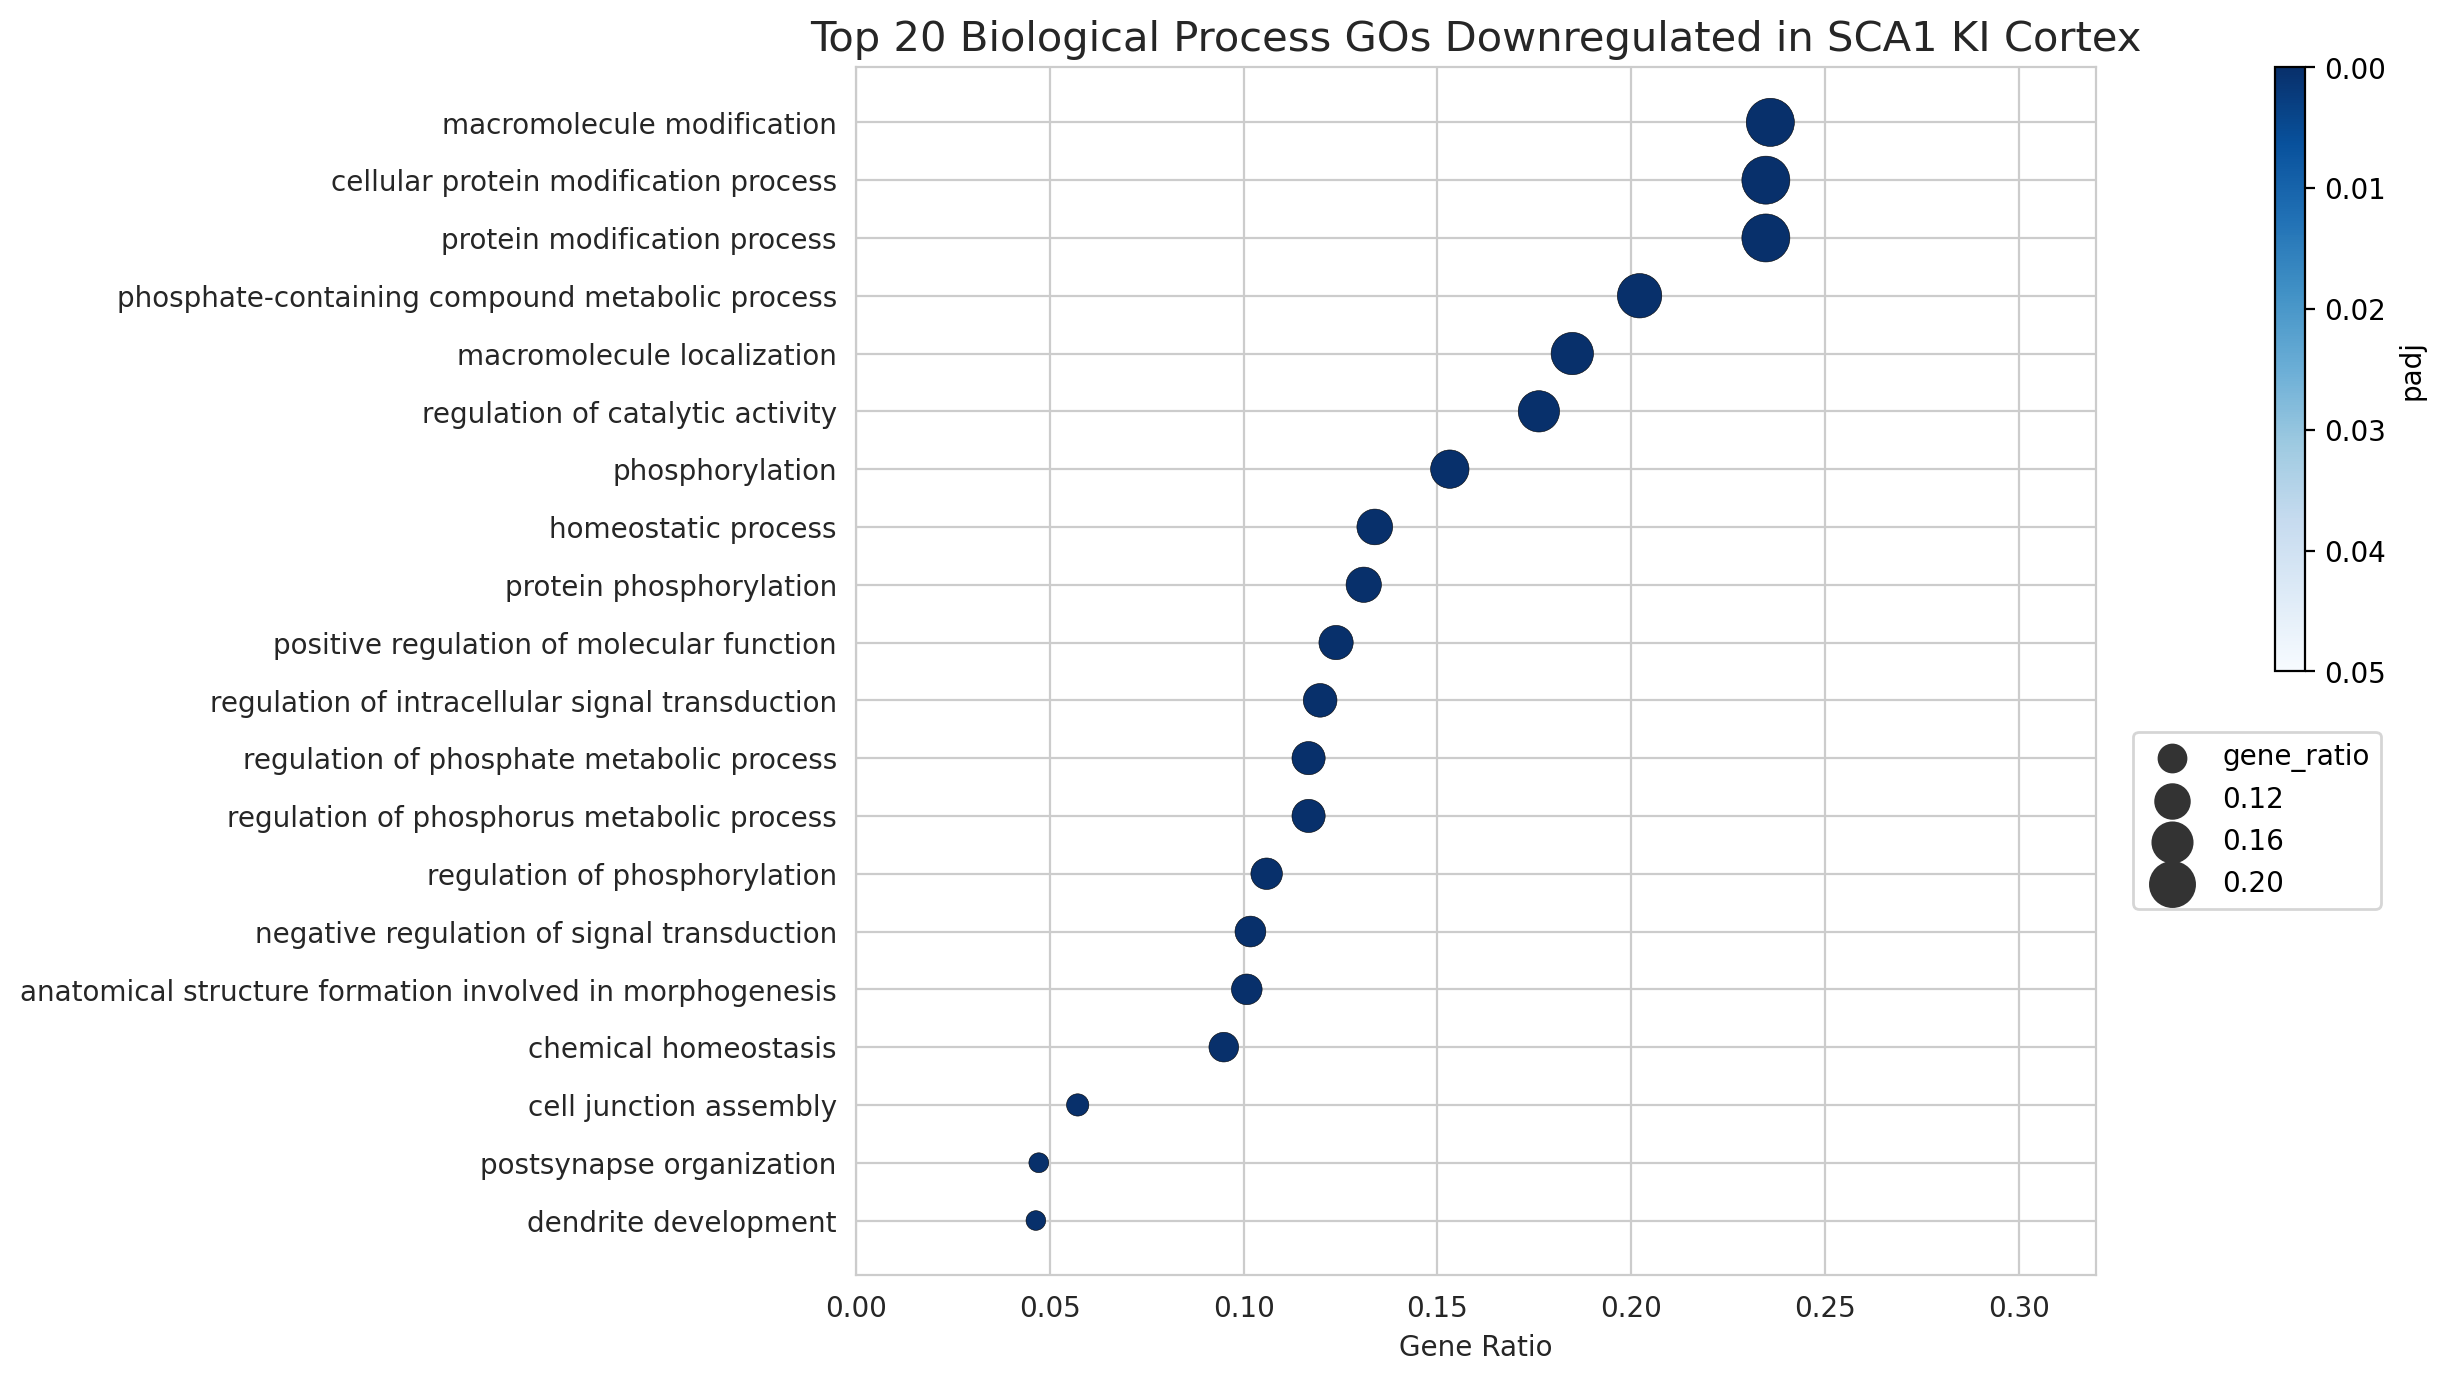

In [8]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.05)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_unique_cx, 
                         x="gene_ratio_CX_Down", 
                         y="term_name", 
                         hue="adjusted_p_value__CX_Down", 
                         size="gene_ratio_CX_Down", 
                         sizes=(50, 300),
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlabel = "Gene Ratio", ylabel="", xlim=(0.0, 0.32))

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
l[6] = "gene_ratio"
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 20 Biological Process GOs Downregulated in SCA1 KI Cortex", size=15)

plt.savefig('Top_20_BP_GOs_Down_CX.jpg', bbox_inches='tight')

plt.show(ax)

### MF Data

In [13]:
mf_cx_cb_data = pd.read_csv("mf_cx_cb_down_copy.csv")
print(mf_cx_cb_data.shape)
mf_cx_cb_data.head()

(217, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down
0,GO:MF,protein binding,GO:0005515,10481,25412,1.740000e-102,1.740000e-102,1754,1160,0.661345,4.380000e-26,4.380000e-26,876,522,0.595890
1,GO:MF,binding,GO:0005488,16232,25412,1.010000e-48,1.010000e-48,1739,1390,0.799310,3.180000e-08,3.180000e-08,876,648,0.739726
2,GO:MF,metal ion transmembrane transporter activity,GO:0046873,417,25412,8.830000e-36,8.830000e-36,1632,110,0.067402,2.580000e-18,2.580000e-18,874,60,0.068650
3,GO:MF,gated channel activity,GO:0022836,324,25412,1.650000e-32,1.650000e-32,1626,92,0.056581,4.650000e-32,4.650000e-32,874,69,0.078947
4,GO:MF,voltage-gated ion channel activity,GO:0005244,190,25412,2.320000e-32,2.320000e-32,1626,70,0.043050,2.470000e-26,2.470000e-26,874,49,0.056064


In [14]:
mf_cx_cb_data = mf_cx_cb_data[(mf_cx_cb_data.term_size < 5000) & (mf_cx_cb_data.term_size > 8)]
mf_cx_cb_data.shape

(199, 15)

In [15]:
mf_unique_cx = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CB_Down >= 0.05)].sort_values(by="adjusted_p_value__CX_Down")
mf_unique_cx = mf_unique_cx[1:21].sort_values(by='gene_ratio_CX_Down', ascending = False)
mf_unique_cx["region"] = "CX"
print(mf_unique_cx.shape)
mf_unique_cx.head()

(20, 16)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region
25,GO:MF,enzyme binding,GO:0019899,2265,25412,9.980000e-19,9.980000e-19,1427,236,0.165382,1.0,1.0,741,75,0.101215,CX
51,GO:MF,small molecule binding,GO:0036094,2561,25412,3.840000e-11,3.840000e-11,1547,247,0.159664,1.0,1.0,250,30,0.120000,CX
46,GO:MF,anion binding,GO:0043168,2439,25412,1.900000e-11,1.900000e-11,1547,239,0.154493,1.0,1.0,868,100,0.115207,CX
54,GO:MF,carbohydrate derivative binding,GO:0097367,2278,25412,4.680000e-11,4.680000e-11,1749,248,0.141795,1.0,1.0,357,46,0.128852,CX
36,GO:MF,enzyme regulator activity,GO:0030234,1206,25412,2.320000e-14,2.320000e-14,930,106,0.113978,1.0,1.0,828,55,0.066425,CX


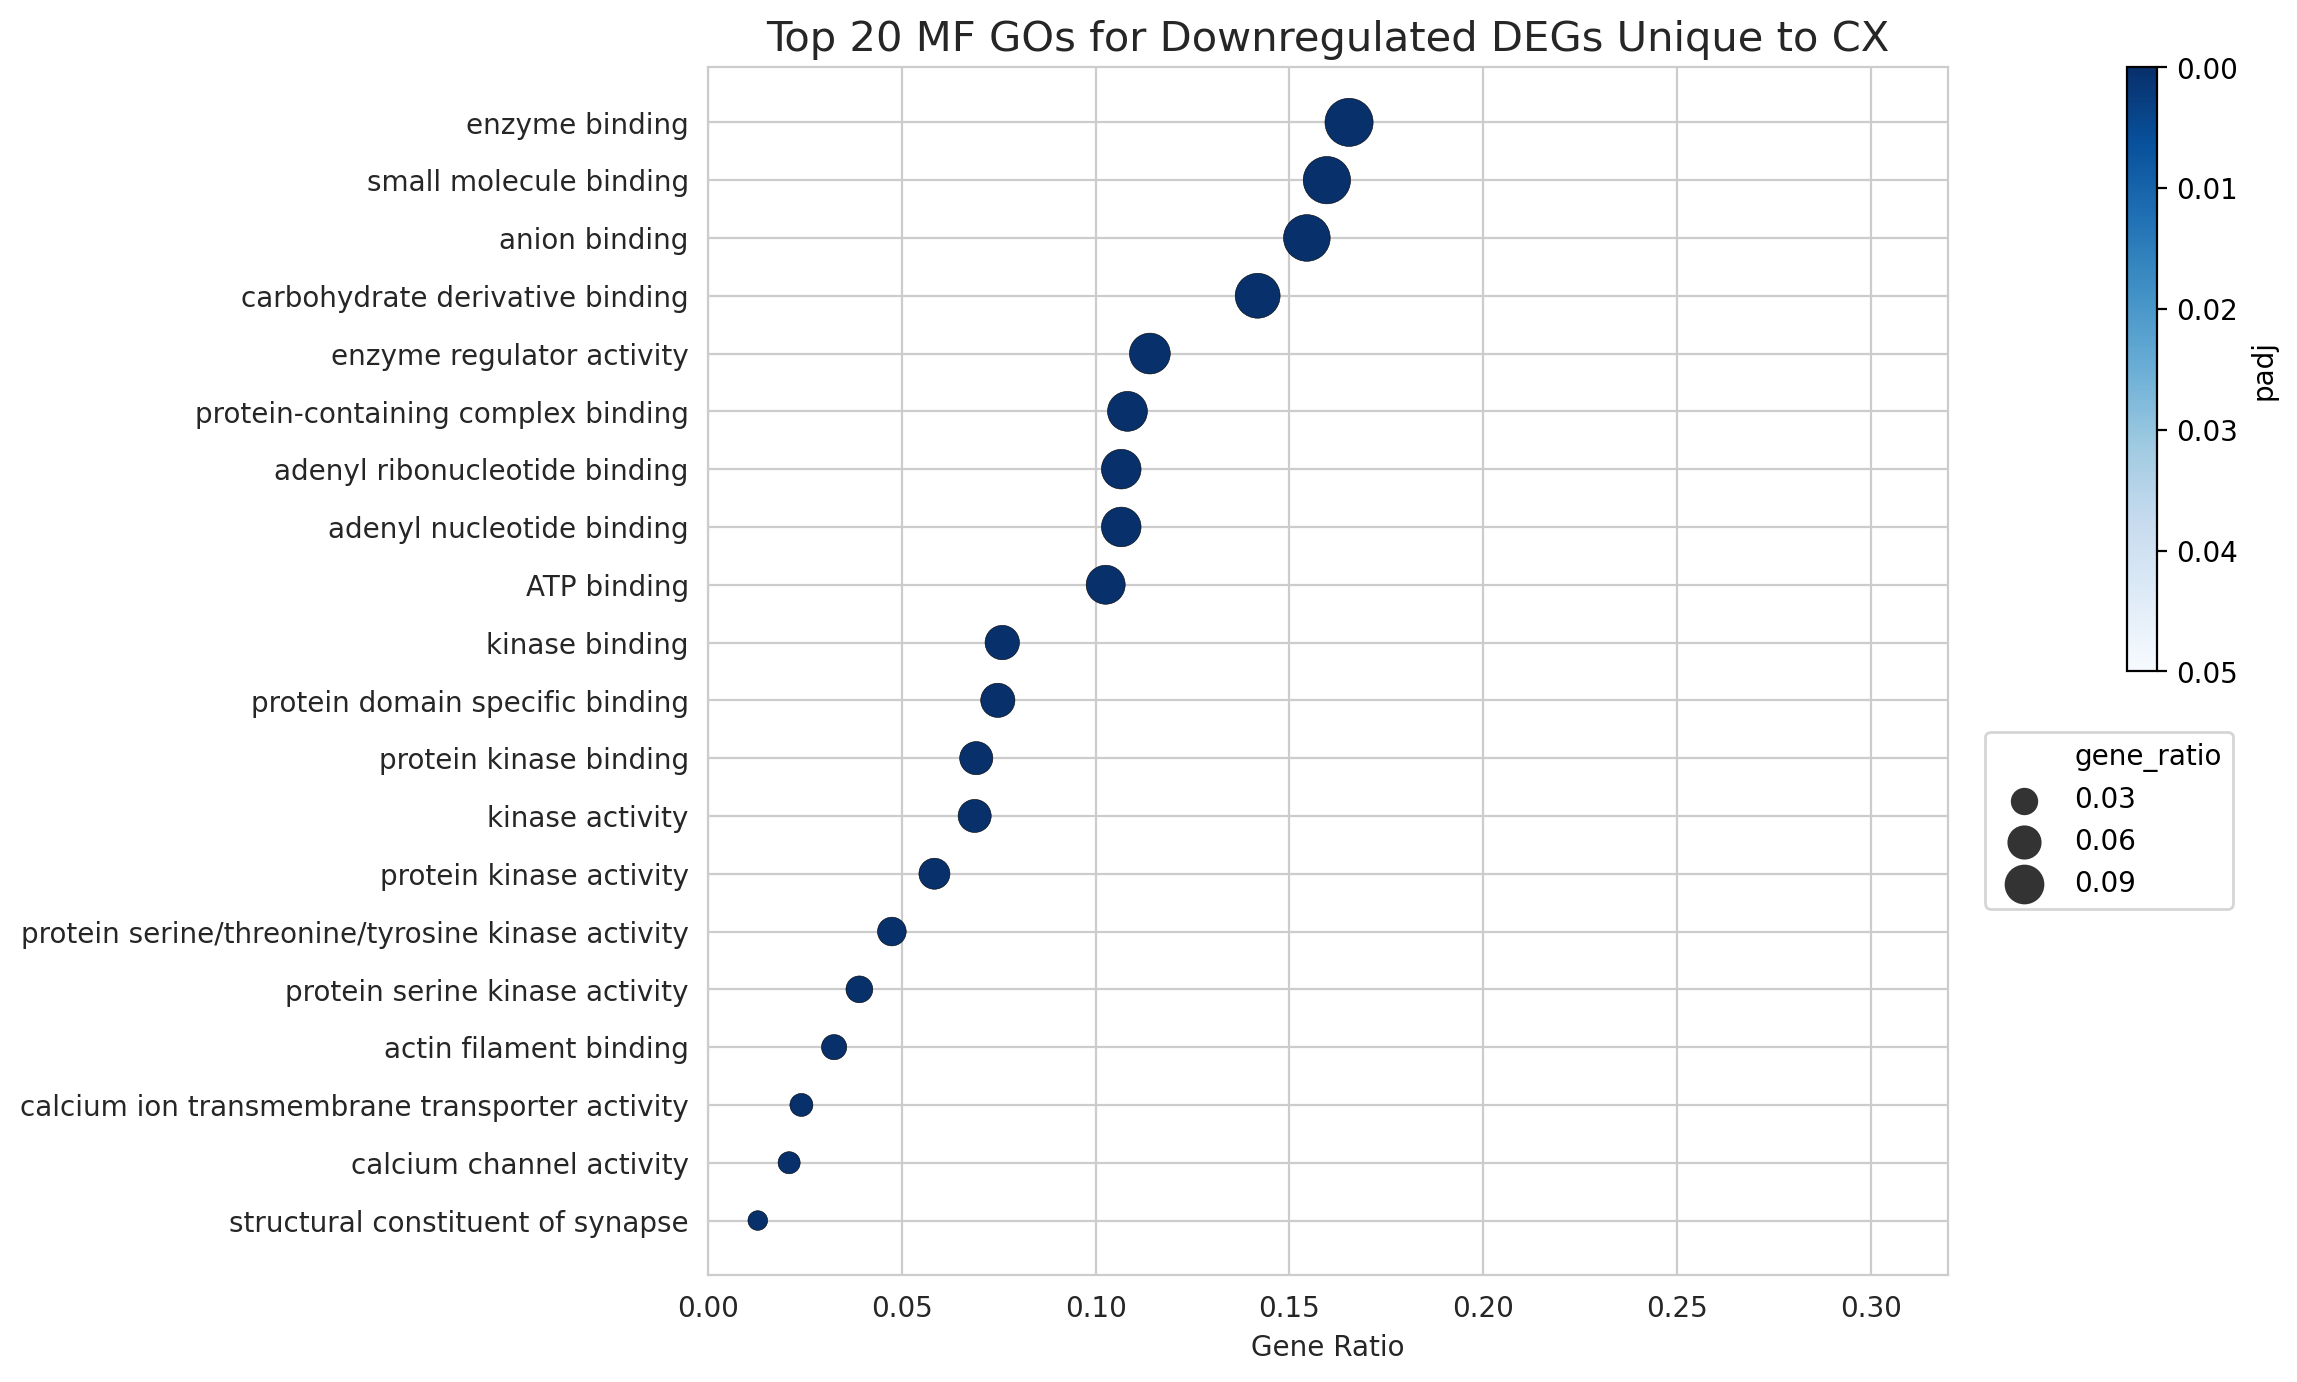

In [27]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.05)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_unique_cx, 
                         x="gene_ratio_CX_Down", 
                         y="term_name", 
                         hue="adjusted_p_value__CX_Down", 
                         size="gene_ratio_CX_Down", 
                         sizes=(50, 300),
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)

sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlabel = "Gene Ratio", ylabel="", xlim=(0, 0.32))

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
l[6] = "gene_ratio"
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 20 MF GOs for Downregulated DEGs Unique to CX", size=15)

plt.savefig('Top_20_MF_GOs_Down_CX.pdf', bbox_inches='tight')

plt.show(ax)